## Calculating distances

Now that we have a simulation trajectory, let us consider how to determine the scattering from it. 
`MDanalysis` is a powerful python package for all things related to analysing molecular dynamics structures, we will use this to help our analysis. 
First we need to read in the trajectory.

In [1]:
import MDAnalysis as mda

u = mda.Universe('../assets/lysozyme.pdb')

This reads the simulation trajectory into the object `u`.
We can then iterate through the timesteps with a `for` loop. 

In [2]:
for ts in u.trajectory:
    print(ts)

< Timestep 0 with unit cell dimensions [69.594 69.594 69.594 90.    90.    90.   ] >
< Timestep 1 with unit cell dimensions [69.692 69.692 69.692 90.    90.    90.   ] >
< Timestep 2 with unit cell dimensions [69.619 69.619 69.619 90.    90.    90.   ] >
< Timestep 3 with unit cell dimensions [69.703 69.703 69.703 90.    90.    90.   ] >
< Timestep 4 with unit cell dimensions [69.652 69.652 69.652 90.    90.    90.   ] >
< Timestep 5 with unit cell dimensions [69.648 69.648 69.648 90.    90.    90.   ] >
< Timestep 6 with unit cell dimensions [69.621 69.621 69.621 90.    90.    90.   ] >
< Timestep 7 with unit cell dimensions [69.648 69.648 69.648 90.    90.    90.   ] >
< Timestep 8 with unit cell dimensions [69.735 69.735 69.735 90.    90.    90.   ] >
< Timestep 9 with unit cell dimensions [69.641 69.641 69.641 90.    90.    90.   ] >
< Timestep 10 with unit cell dimensions [69.58 69.58 69.58 90.   90.   90.  ] >


As we can see, this trajectory has 11 timesteps. 
Now let us find the distances between each atom in the first of these timesteps, and plot them as a histogram.
Note, if you run this for yourself it is really quite slow (hinting to the rational for the development of the more efficient methods metioned earlier). 

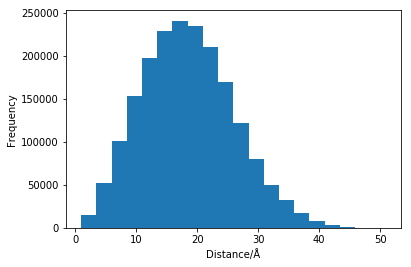

In [4]:
import matplotlib.pyplot as plt
from MDAnalysis.analysis.distances import dist

for ts in u.trajectory:
    distances = []
    for i in range(0, len(u.atoms)-1):
        for j in range(i + 1, len(u.atoms)):
            distances.append(dist(mda.AtomGroup([u.atoms[i]]), mda.AtomGroup([u.atoms[j]]), box=ts.dimensions)[2][0])
    break
    
plt.hist(distances, bins=20)
plt.xlabel('Distance/Å')
plt.ylabel('Frequency')
plt.show()

So we now have a histogram of all of the interatomic distances, but that gives useful no information about the scattering. 
This is because we have not considered the scattering lengths for each of the elements. 